In [1]:
import pennylane as qml
from pennylane import numpy as np
import random
import torch
from matplotlib import pyplot as plt

In [2]:
qubits = 8
layer = 3

In [3]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface='torch', diff_method='backprop')
def gen_circuit(w):
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    for l in range(layer):
        for i in range(qubits):
            qml.RY(w[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(w[i+qubits], wires=i+1)
        qml.CNOT(wires=[i+1, 0])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

In [4]:
gen_weights = np.random.rand(layer*(qubits*2-1))*2*np.pi-np.pi

In [5]:
gen_weights

tensor([-0.64770654, -2.85688225, -2.71154303, -3.13907593, -1.48469947,
         2.30492896,  0.76716272, -2.96502719,  1.9451705 , -2.59541716,
         0.77763435, -1.2848138 , -1.93050655, -0.23020389, -0.73465835,
         0.65949988, -1.90490518, -0.00713605, -2.70892729, -3.07606256,
         0.25732839,  2.64167883,  2.29252595,  2.54775603, -0.92358839,
        -0.57961788, -1.57093113, -1.51369492, -2.06276083,  2.71674394,
        -2.35909243, -1.69856682, -1.49861216,  0.55408895, -0.29479517,
         1.96325793,  2.45022292, -0.76788983,  2.73472551,  0.44898657,
        -0.00546618, -0.83008081, -2.74281627, -0.25311396,  0.38882319], requires_grad=True)

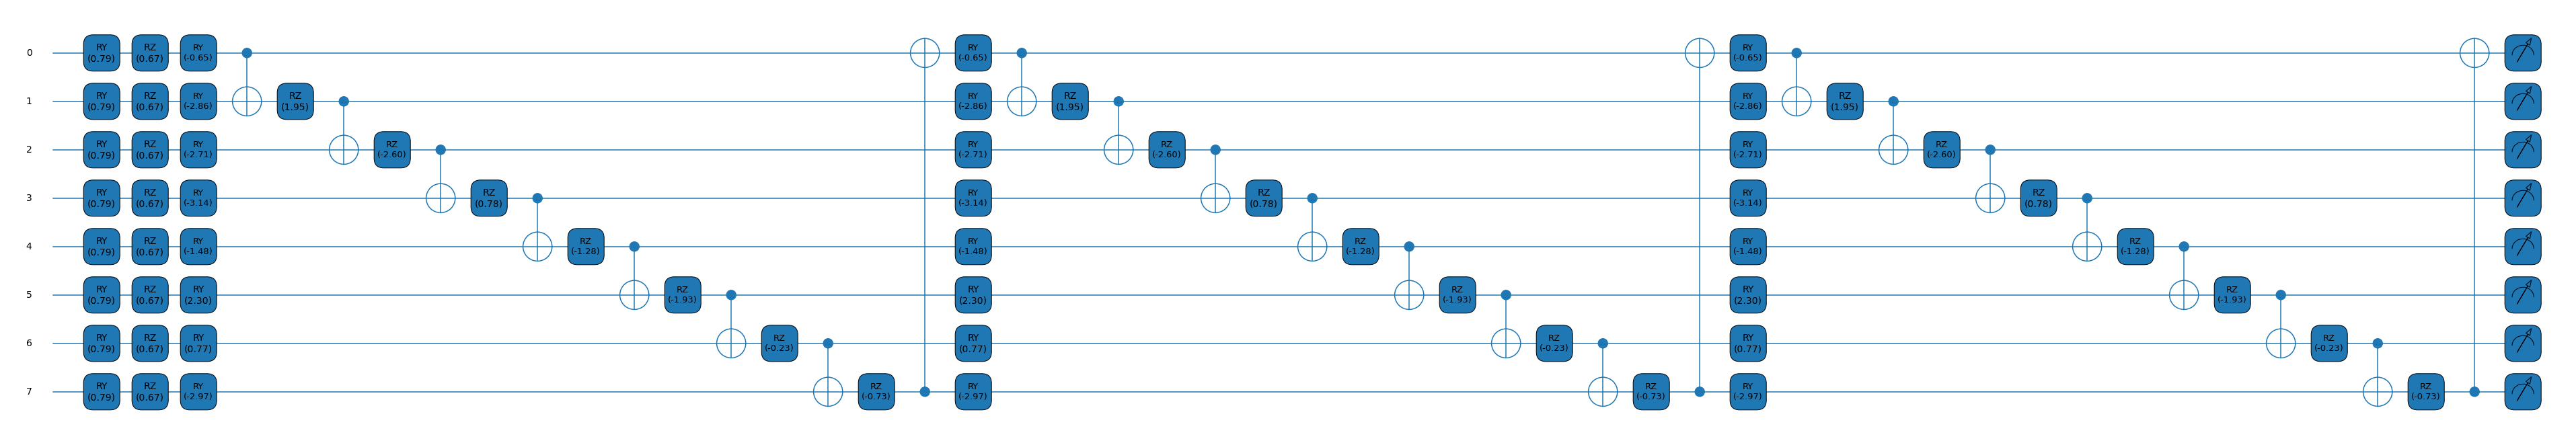

In [6]:
fig, ax = qml.draw_mpl(gen_circuit, decimals=2)(gen_weights)

In [ ]:
sample_list = [gen_circuit(gen_weights) for i in range(5000)]

In [ ]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

In [ ]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()